In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split  # <-- Add this

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)


In [11]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [17]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[402   1]
 [  6  41]]


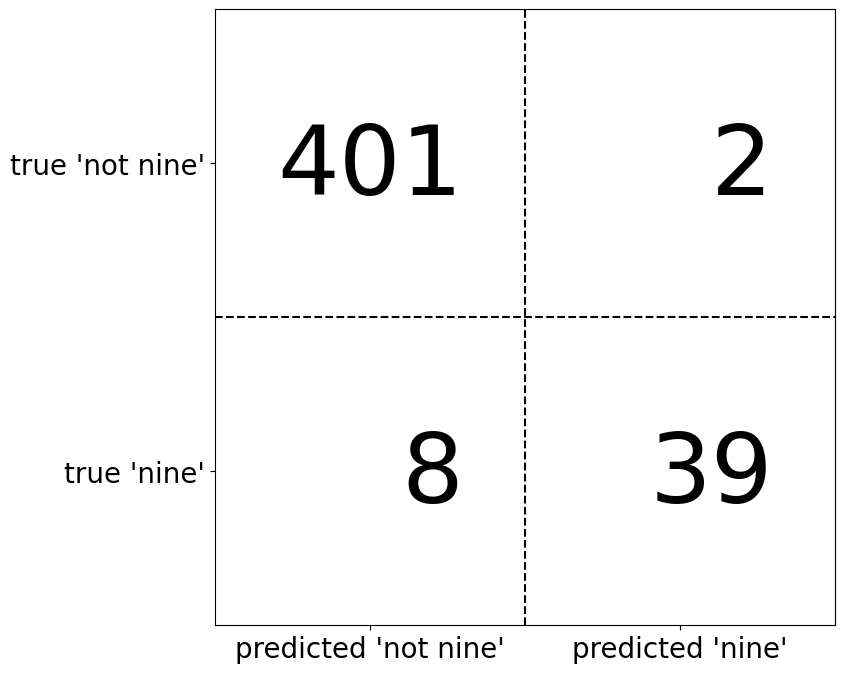

In [21]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()


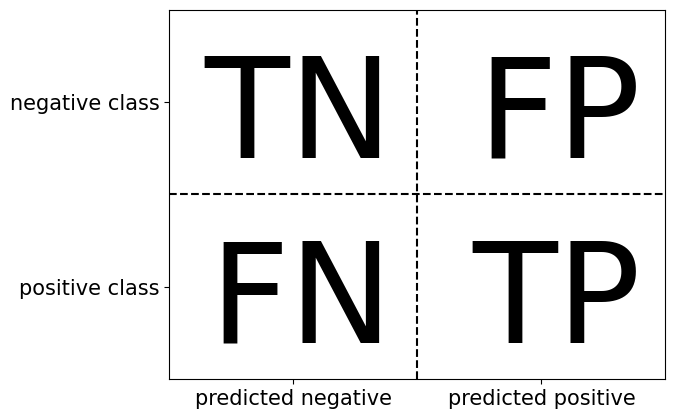

In [23]:
mglearn.plots.plot_binary_confusion_matrix()


In [29]:
from sklearn.tree import DecisionTreeClassifier

# 1. Train the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# 2. Make predictions
pred_tree = tree.predict(X_test)

# 3. Now this will work
print("\nDecision Tree:")
print(confusion_matrix(y_test, pred_tree))



Decision Tree:
[[394   9]
 [ 12  35]]


In [33]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
 f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
 f1_score(y_test, pred_logreg)))


f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.77
f1 score logistic regression: 0.92


In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Load data
digits = load_digits()
X = digits.data
y = digits.target == 9  # Binary classification: Is the digit 9?

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Dummy classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

# Decision Tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

# Logistic Regression with scaling
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

# Confusion Matrices
print("Confusion Matrix - Dummy Classifier:")
print(confusion_matrix(y_test, pred_dummy))

print("\nConfusion Matrix - Decision Tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nConfusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

# Classification Reports
print("\nClassification Report - Dummy Classifier:")
print(classification_report(y_test, pred_dummy, zero_division=0))

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, pred_tree, zero_division=0))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, pred_logreg, zero_division=0))


Confusion Matrix - Dummy Classifier:
[[403   0]
 [ 47   0]]

Confusion Matrix - Decision Tree:
[[394   9]
 [ 12  35]]

Confusion Matrix - Logistic Regression:
[[403   0]
 [  7  40]]

Classification Report - Dummy Classifier:
              precision    recall  f1-score   support

       False       0.90      1.00      0.94       403
        True       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


Classification Report - Decision Tree:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       403
        True       0.80      0.74      0.77        47

    accuracy                           0.95       450
   macro avg       0.88      0.86      0.87       450
weighted avg       0.95      0.95      0.95       450


Classification Report - Logistic Regression:
              precision    recall  

In [41]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Load data
digits = load_digits()
X = digits.data
y = digits.target == 9  # Binary classification: is the digit 9?

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Dummy classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

# Decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

# Logistic regression with scaling
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

# Print confusion matrices
print("Confusion Matrix - Dummy Classifier:")
print(confusion_matrix(y_test, pred_dummy))

print("\nConfusion Matrix - Decision Tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nConfusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

# Print classification reports with zero_division=0 to avoid warnings
print("\nClassification Report - Dummy Classifier:")
print(classification_report(y_test, pred_dummy, zero_division=0))

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, pred_tree, zero_division=0))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, pred_logreg, zero_division=0))


Confusion Matrix - Dummy Classifier:
[[403   0]
 [ 47   0]]

Confusion Matrix - Decision Tree:
[[394   9]
 [ 12  35]]

Confusion Matrix - Logistic Regression:
[[403   0]
 [  7  40]]

Classification Report - Dummy Classifier:
              precision    recall  f1-score   support

       False       0.90      1.00      0.94       403
        True       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


Classification Report - Decision Tree:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       403
        True       0.80      0.74      0.77        47

    accuracy                           0.95       450
   macro avg       0.88      0.86      0.87       450
weighted avg       0.95      0.95      0.95       450


Classification Report - Logistic Regression:
              precision    recall  

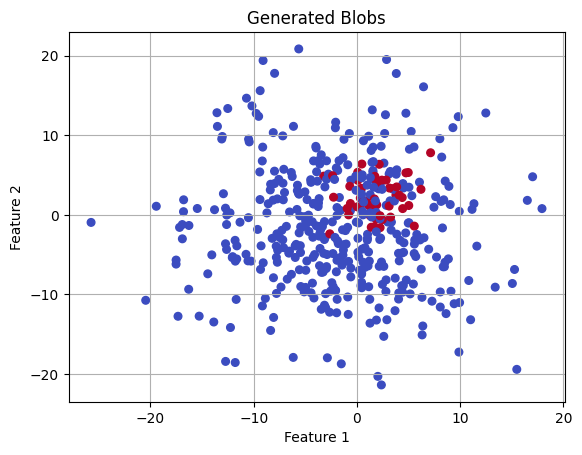

In [45]:
from mglearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Fix: define centers explicitly
X, y = make_blobs(n_samples=(400, 50),
                  centers=[[-2, -2], [2, 2]],
                  cluster_std=[7.0, 2.0],
                  random_state=22)

# Split and train SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

# Optional: plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.title("Generated Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [49]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [57]:
import numpy as np

print("Test label distribution:", np.bincount(y_test))
print("Predicted label distribution:", np.bincount(pred_logreg))


Test label distribution: [96 17]
Predicted label distribution: [410  40]


In [61]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
 y_test, svc.decision_function(X_test))

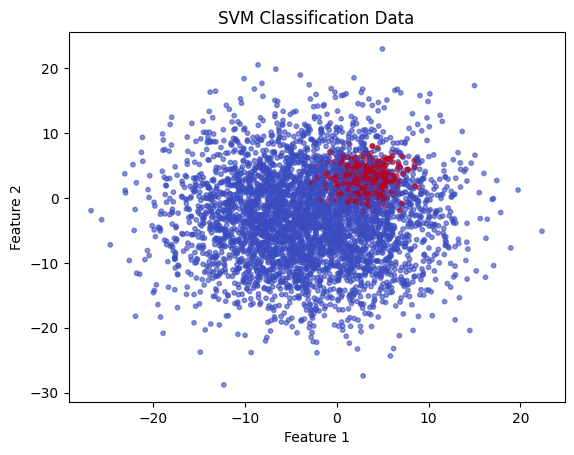

In [65]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# ✅ Fix: define explicit 2D centers for each cluster
X, y = make_blobs(n_samples=(4000, 500),
                  centers=[[-3, -3], [3, 3]],
                  cluster_std=[7.0, 2.0],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train an SVM model
svc = SVC(gamma=0.05)
svc.fit(X_train, y_train)

# Optional: Visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10, alpha=0.6)
plt.title("SVM Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


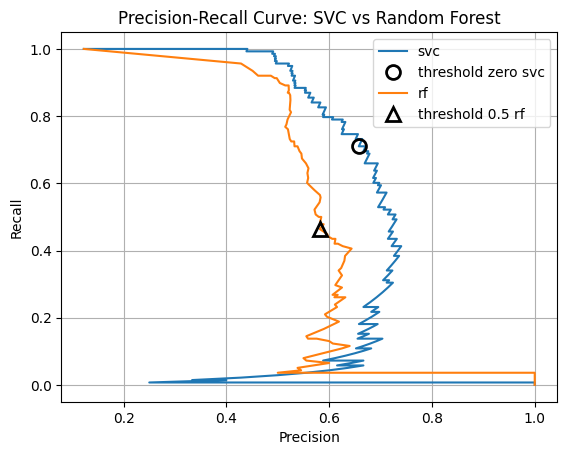

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Train SVC with probability estimates
svc = SVC(probability=True)
svc.fit(X_train, y_train)

# SVC precision-recall
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RF precision-recall
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

# Plot
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Precision-Recall Curve: SVC vs Random Forest")
plt.grid(True)
plt.show()


In [71]:
print("f1_score of random forest: {:.3f}".format(
 f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))


f1_score of random forest: 0.512
f1_score of svc: 0.685


In [73]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.567
Average precision of svc: 0.656


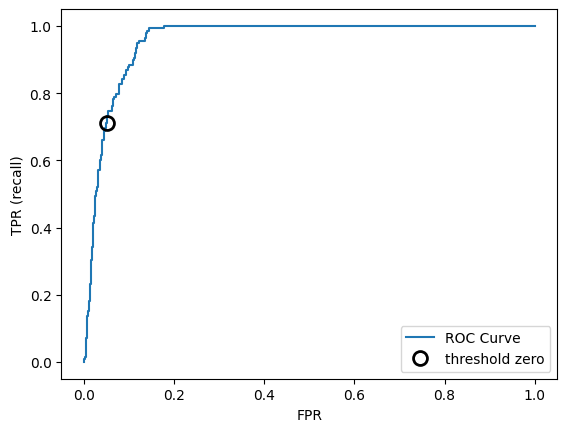

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


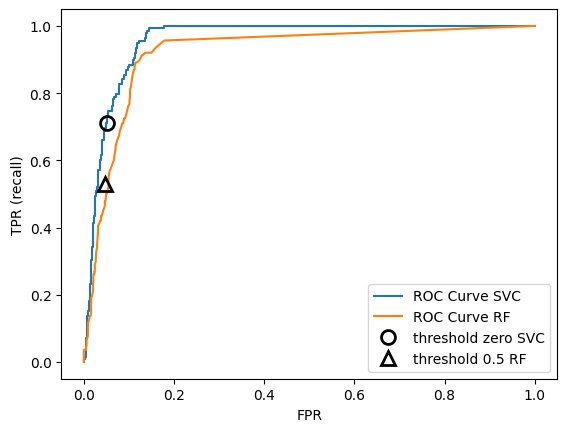

In [77]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
 label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [79]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))

AUC for Random Forest: 0.921


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


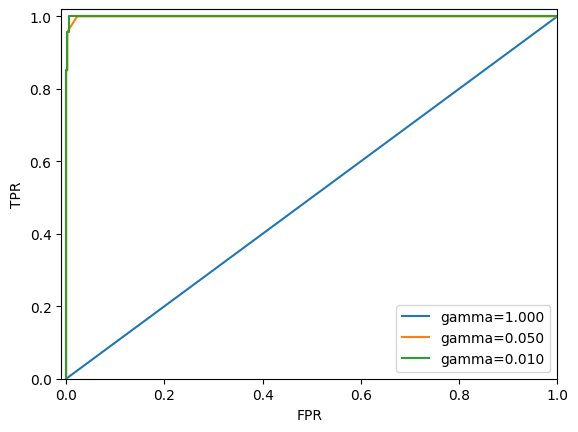

In [81]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
 svc = SVC(gamma=gamma).fit(X_train, y_train)
 accuracy = svc.score(X_test, y_test)
 auc = roc_auc_score(y_test, svc.decision_function(X_test))
 fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
 print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
 gamma, accuracy, auc))
 plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

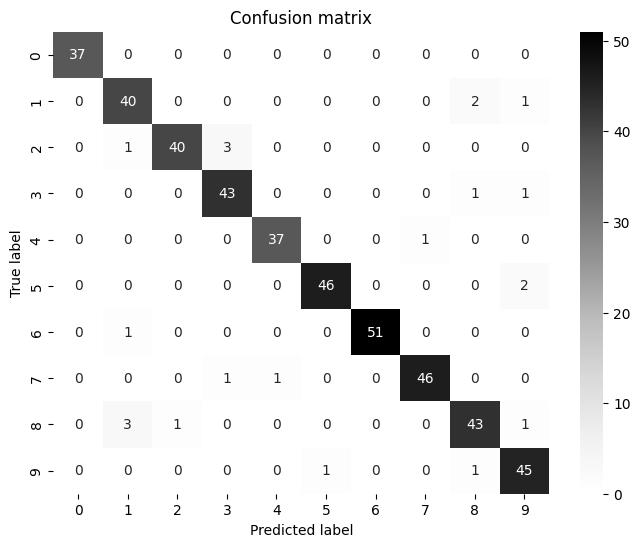

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys", 
            xticklabels=digits.target_names, yticklabels=digits.target_names)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show()


In [97]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [99]:
print("Micro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="macro")))


Micro average f1 score: 0.951
Macro average f1 score: 0.952


In [103]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

digits = load_digits()

# Binary classification: is the digit 9?
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))

# Explicitly specifying accuracy
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
                                    scoring="accuracy")
print("Explicit accuracy: {}".format(explicit_accuracy))


Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("Grid-Search with accuracy")
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))


Grid-Search with accuracy
Best parameters:  {'gamma': 0.0001}
Best cross-validation score: 0.976


In [109]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [111]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

ModuleNotFoundError: No module named 'sklearn.metrics.scorer'